In [1]:
"""
Field Name	Definition
AsOfDate	Date when the data was recorded
Program	Indicator of whether loan was approved under SBA's 7(a) or 504 loan program
BorrName	Borrower name
BorrStreet	Borrower street address
BorrCity	Borrower city
BorrState	Borrower state
BorrZip	Borrower zip code
CDC_Name	Name of CDC that the loan is currently assigned to
CDC_Street	CDC street address
CDC_City	CDC city
CDC_State	CDC state
CDC_Zip	CDC zip code
ThirdPartyLender_Name	Name of third party lender
ThirdPartyLender_City	Third party lender city
ThirdPartyLender_State	Third party lender state
ThirdPartyDollars	Third party loan amount
GrossApproval	SBA/CDC loan amount
ApprovalDate	Date the loan was approved
ApprovalFiscalYear	Fiscal year the loan was approved
FirstDisbursementDate	Date of first loan disbursement (if available)
DeliveryMethod	"Specific delivery method loan was approved under.  See SOP 50 10 5 for definitions and rules for each delivery method.  
504 Delivery Methods:
• 504 = Regular 504
• 504REFI = 504 Refinance (inactive)
• ALP = Accredited Lenders Program
• PCLP = Premier Certified Lenders "
Subprogram	Subprogram description - specific subprogram loan was aproved under.  See SOP 50 10 5 for definitions and rules for each subprogram.
TermInMonths	Length of loan term
NaicsCode	North American Industry Classification System (NAICS) code
NaicsDescription	North American Industry Classification System (NAICS) description
FranchiseCode	Franchise Code
FranchiseName	Franchise Name (if applicable)
ProjectCounty	County where project occurs
ProjectState	State where project occurs
SBADistrictOffice	SBA district office
CongressionalDistrict	Congressional district where project occurs
BusinessType	Borrower Business Type - Individual, Partnership, or Corporation
BusinessAge	"SBA began collecting the following business age information in fiscal year 2018:  
• Change of Ownership
• Existing or more than 2 years old
• New Business or 2 years or less
• Startup, Loan Funds will Open Business"
LoanStatus	"Current status of loan:  
• NOT FUNDED = Undisbursed
• PIF = Paid In Full
• CHGOFF = Charged Off
• CANCLD = Cancelled
• EXEMPT = The status of loans that have been disbursed but have not been cancelled, paid in full, or charged off are exempt from disclosure under FOIA Exemption 4"
PaidInFullDate	Date loan was paid in full (if applicable)
ChargeOffDate	Date SBA charged off loan (if applicable)
GrossChargeOffAmount	Total SBA/CDC loan balance charged off
JobsSupported	Total Jobs Created + Jobs Retained as reported by lender on SBA Loan Application.  SBA does not review, audit, or validate these numbers - they are simply self-reported, good faith estimates by the lender.

"""


'\nField Name\tDefinition\nAsOfDate\tDate when the data was recorded\nProgram\tIndicator of whether loan was approved under SBA\'s 7(a) or 504 loan program\nBorrName\tBorrower name\nBorrStreet\tBorrower street address\nBorrCity\tBorrower city\nBorrState\tBorrower state\nBorrZip\tBorrower zip code\nCDC_Name\tName of CDC that the loan is currently assigned to\nCDC_Street\tCDC street address\nCDC_City\tCDC city\nCDC_State\tCDC state\nCDC_Zip\tCDC zip code\nThirdPartyLender_Name\tName of third party lender\nThirdPartyLender_City\tThird party lender city\nThirdPartyLender_State\tThird party lender state\nThirdPartyDollars\tThird party loan amount\nGrossApproval\tSBA/CDC loan amount\nApprovalDate\tDate the loan was approved\nApprovalFiscalYear\tFiscal year the loan was approved\nFirstDisbursementDate\tDate of first loan disbursement (if available)\nDeliveryMethod\t"Specific delivery method loan was approved under.  See SOP 50 10 5 for definitions and rules for each delivery method.  \n504 De

In [2]:

import pandas as pd
import numpy as np
pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns',76)
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,classification_report
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv(r'foia-504-fy2010-present-asof-240331.csv' , encoding='latin-1')
df.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,CDC_Zip,ThirdPartyLender_Name,ThirdPartyLender_City,ThirdPartyLender_State,ThirdPartyDollars,GrossApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,Subprogram,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,JobsSupported
0,20240331,504,Turning Brook,300 & 400 Oxbow Dr 100 Villa,Alpena,MI,49707,Michigan Certified Development,"3737 Coolidge Road, 2nd Floor",East Lansing,MI,48823.0,MERCANTILE BANK,GRAND RAPIDS,MI,1767117.0,1248000,10/02/2009,2010,01/12/2011,ALP,Sec. 504 - Loan Guarantees - Private Sector Fi...,240,623312.0,Homes for the Elderly,NaN,NaN,ALPENA,MI,MICHIGAN DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,12/31/2012,NaN,0,14
1,20240331,504,HAMMES SEED INC,1123 120th Rd..,Seneca,KS,66538,"Frontier Financial Partners, I",1512 W 6th Ave.,Emporia,KS,66801.0,COMMUNITY NATIONAL BANK,SENECA,KS,335000.0,273000,10/02/2009,2010,01/13/2010,504,Sec. 504 - Loan Guarantees - Private Sector Fi...,240,424510.0,Grain and Field Bean Merchant Wholesalers,80979,TEMPORARY FRANCHISES,NEMAHA,KS,KANSAS CITY DISTRICT OFFICE,2.0,CORPORATION,NaN,EXEMPT,NaN,NaN,0,1
2,20240331,504,"Rocket Express, LLC",1122 Blue Laker Boulevard Nort,Twin falls,ID,83301,Region IV Development Corporat,202 Falls Avenue,Twin Falls,ID,83303.0,BANNER BANK,WALLA WALLA,WA,2634500.0,1594000,10/02/2009,2010,10/13/2010,504,Sec. 504 - Loan Guarantees - Private Sector Fi...,240,811192.0,Car Washes,NaN,NaN,TWIN FALLS,ID,BOISE DISTRICT OFFICE,2.0,CORPORATION,NaN,PIF,09/30/2015,NaN,0,8
3,20240331,504,Martin Harper P.C.,3 E. Ramona Avenue.,Colorado springs,CO,80905,Pikes Peak Regional Developmen,322 S. Cascade Avenue,Colorado Springs,CO,80903.0,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",COLUMBUS,OH,157583.0,127000,10/02/2009,2010,01/12/2011,504,Sec. 504 - Loan Guarantees - Private Sector Fi...,240,541211.0,Offices of Certified Public Accountants,NaN,NaN,EL PASO,CO,COLORADO DISTRICT OFFICE,5.0,CORPORATION,NaN,PIF,11/30/2020,NaN,0,1
4,20240331,504,"Shield Security Systems, L.L.C",7456 West 5th Avenue.,Lakewood,CO,80226,B:Side Capital,3350 Brighton Blvd,Denver,CO,80216.0,"ZIONS BANK, A DIVISION OF",SALT LAKE CITY,UT,936500.0,757000,10/02/2009,2010,06/16/2010,PCLP,Sec. 504 - Premier Certified Lender Program,240,332510.0,Hardware Manufacturing,NaN,NaN,JEFFERSON,CO,COLORADO DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,05/31/2016,NaN,0,40


In [3]:
print(df.info(),'\n')
print((df.isnull().sum()/len(df))*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103564 entries, 0 to 103563
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   AsOfDate                103564 non-null  int64  
 1   Program                 103564 non-null  int64  
 2   BorrName                103564 non-null  object 
 3   BorrStreet              103564 non-null  object 
 4   BorrCity                103564 non-null  object 
 5   BorrState               103564 non-null  object 
 6   BorrZip                 103564 non-null  int64  
 7   CDC_Name                103563 non-null  object 
 8   CDC_Street              103563 non-null  object 
 9   CDC_City                103563 non-null  object 
 10  CDC_State               103563 non-null  object 
 11  CDC_Zip                 103563 non-null  float64
 12  ThirdPartyLender_Name   103431 non-null  object 
 13  ThirdPartyLender_City   103409 non-null  object 
 14  ThirdPartyLender_Sta

In [4]:
df['LoanStatus'].value_counts(normalize=True)

LoanStatus
EXEMPT        0.507855
PIF           0.288504
CANCLD        0.117502
NOT FUNDED    0.078158
CHGOFF        0.007981
Name: proportion, dtype: float64

In [5]:
df_filtererd=df[(df['LoanStatus']=='PIF') | (df['LoanStatus']=='CHGOFF')]
df_filtererd['ApprovalDate'] = pd.to_datetime(df_filtererd['ApprovalDate'], errors='coerce')
df_filtererd['ApprovalYear'] = df_filtererd['ApprovalDate'].dt.year
df_filtererd['ApprovalMonth'] = df_filtererd['ApprovalDate'].dt.month
df_filtererd

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,CDC_Zip,ThirdPartyLender_Name,ThirdPartyLender_City,ThirdPartyLender_State,ThirdPartyDollars,GrossApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,Subprogram,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,JobsSupported,ApprovalYear,ApprovalMonth
0,20240331,504,Turning Brook,300 & 400 Oxbow Dr 100 Villa,Alpena,MI,49707,Michigan Certified Development,"3737 Coolidge Road, 2nd Floor",East Lansing,MI,48823.0,MERCANTILE BANK,GRAND RAPIDS,MI,1767117.0,1248000,2009-10-02,2010,01/12/2011,ALP,Sec. 504 - Loan Guarantees - Private Sector Fi...,240,623312.0,Homes for the Elderly,NaN,NaN,ALPENA,MI,MICHIGAN DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,12/31/2012,NaN,0,14,2009,10
2,20240331,504,"Rocket Express, LLC",1122 Blue Laker Boulevard Nort,Twin falls,ID,83301,Region IV Development Corporat,202 Falls Avenue,Twin Falls,ID,83303.0,BANNER BANK,WALLA WALLA,WA,2634500.0,1594000,2009-10-02,2010,10/13/2010,504,Sec. 504 - Loan Guarantees - Private Sector Fi...,240,811192.0,Car Washes,NaN,NaN,TWIN FALLS,ID,BOISE DISTRICT OFFICE,2.0,CORPORATION,NaN,PIF,09/30/2015,NaN,0,8,2009,10
3,20240331,504,Martin Harper P.C.,3 E. Ramona Avenue.,Colorado springs,CO,80905,Pikes Peak Regional Developmen,322 S. Cascade Avenue,Colorado Springs,CO,80903.0,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",COLUMBUS,OH,157583.0,127000,2009-10-02,2010,01/12/2011,504,Sec. 504 - Loan Guarantees - Private Sector Fi...,240,541211.0,Offices of Certified Public Accountants,NaN,NaN,EL PASO,CO,COLORADO DISTRICT OFFICE,5.0,CORPORATION,NaN,PIF,11/30/2020,NaN,0,1,2009,10
4,20240331,504,"Shield Security Systems, L.L.C",7456 West 5th Avenue.,Lakewood,CO,80226,B:Side Capital,3350 Brighton Blvd,Denver,CO,80216.0,"ZIONS BANK, A DIVISION OF",SALT LAKE CITY,UT,936500.0,757000,2009-10-02,2010,06/16/2010,PCLP,Sec. 504 - Premier Certified Lender Program,240,332510.0,Hardware Manufacturing,NaN,NaN,JEFFERSON,CO,COLORADO DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,05/31/2016,NaN,0,40,2009,10
5,20240331,504,KT&apos;s Bowling Lanes,1501 S. Washington Avenue.,Emmett,ID,83617,"Capital Matrix, Inc.",6429 West Interchange Lane,Boise,ID,83709.0,KEYBANK NATIONAL ASSOCIATION,CLEVELAND,OH,179250.0,111000,2009-10-02,2010,11/17/2010,504,Sec. 504 - Loan Guarantees - Private Sector Fi...,240,713950.0,Bowling Centers,NaN,NaN,GEM,ID,BOISE DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,10/31/2017,NaN,0,10,2009,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96968,20240331,504,"Stratus Auto Equipment, Inc.",8401 Calibration Court,College Station,TX,77845,Community Certified Developmen,13201 Northwest Fwy,Houston,TX,77040.0,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",COLUMBUS,OH,1082000.0,888000,2023-02-07,2023,05/17/2023,504 Refinance,NaN,300,333998.0,NaN,NaN,NaN,BRAZOS,TX,HOUSTON DISTRICT OFFICE,17.0,CORPORATION,Existing or more than 2 years old,PIF,11/30/2023,NaN,0,10,2023,2
97187,20240331,504,Melbourne Rental LLC,6465 South 3000 East Unit 10,Holladay,UT,84121,Intermountain Business Lending,5333 South Adams Ave.,Ogden,UT,84405.0,"ZIONS BANK, A DIVISION OF",SALT LAKE CITY,UT,351975.5,295000,2023-02-22,2023,06/14/2023,Direct Loans,NaN,300,531311.0,Residential Property Managers,NaN,NaN,SALT LAKE,UT,UTAH DISTRICT OFFICE,3.0,CORPORATION,Existing or more than 2 years old,PIF,08/31/2023,NaN,0,4,2023,2
97242,20240331,504,Shamrock Plumbing and DrainCle,4032 Old Winter Garden Rd.,Orlando,FL,32805,Florida Business Development C,1715 North Westshore Blvd,Tampa,FL,33607.0,SEACOAST NATIONAL BANK,STUART,FL,524000.0,529000,2023-02-28,2023,08/16/2023,504 Refinance,NaN,300,238220.0,"Plumbing, Heating, and Air-Conditioning Contra.

In [6]:
df_filtererd['LoanStatus'].value_counts(normalize=True)

LoanStatus
PIF       0.973081
CHGOFF    0.026919
Name: proportion, dtype: float64

In [7]:
df_filtererd['LoanStatus_num']=df_filtererd['LoanStatus'].apply(lambda x:0 if x=='PIF' else 1)
df_filtererd

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,CDC_Zip,ThirdPartyLender_Name,ThirdPartyLender_City,ThirdPartyLender_State,ThirdPartyDollars,GrossApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,Subprogram,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,JobsSupported,ApprovalYear,ApprovalMonth,LoanStatus_num
0,20240331,504,Turning Brook,300 & 400 Oxbow Dr 100 Villa,Alpena,MI,49707,Michigan Certified Development,"3737 Coolidge Road, 2nd Floor",East Lansing,MI,48823.0,MERCANTILE BANK,GRAND RAPIDS,MI,1767117.0,1248000,2009-10-02,2010,01/12/2011,ALP,Sec. 504 - Loan Guarantees - Private Sector Fi...,240,623312.0,Homes for the Elderly,NaN,NaN,ALPENA,MI,MICHIGAN DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,12/31/2012,NaN,0,14,2009,10,0
2,20240331,504,"Rocket Express, LLC",1122 Blue Laker Boulevard Nort,Twin falls,ID,83301,Region IV Development Corporat,202 Falls Avenue,Twin Falls,ID,83303.0,BANNER BANK,WALLA WALLA,WA,2634500.0,1594000,2009-10-02,2010,10/13/2010,504,Sec. 504 - Loan Guarantees - Private Sector Fi...,240,811192.0,Car Washes,NaN,NaN,TWIN FALLS,ID,BOISE DISTRICT OFFICE,2.0,CORPORATION,NaN,PIF,09/30/2015,NaN,0,8,2009,10,0
3,20240331,504,Martin Harper P.C.,3 E. Ramona Avenue.,Colorado springs,CO,80905,Pikes Peak Regional Developmen,322 S. Cascade Avenue,Colorado Springs,CO,80903.0,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",COLUMBUS,OH,157583.0,127000,2009-10-02,2010,01/12/2011,504,Sec. 504 - Loan Guarantees - Private Sector Fi...,240,541211.0,Offices of Certified Public Accountants,NaN,NaN,EL PASO,CO,COLORADO DISTRICT OFFICE,5.0,CORPORATION,NaN,PIF,11/30/2020,NaN,0,1,2009,10,0
4,20240331,504,"Shield Security Systems, L.L.C",7456 West 5th Avenue.,Lakewood,CO,80226,B:Side Capital,3350 Brighton Blvd,Denver,CO,80216.0,"ZIONS BANK, A DIVISION OF",SALT LAKE CITY,UT,936500.0,757000,2009-10-02,2010,06/16/2010,PCLP,Sec. 504 - Premier Certified Lender Program,240,332510.0,Hardware Manufacturing,NaN,NaN,JEFFERSON,CO,COLORADO DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,05/31/2016,NaN,0,40,2009,10,0
5,20240331,504,KT&apos;s Bowling Lanes,1501 S. Washington Avenue.,Emmett,ID,83617,"Capital Matrix, Inc.",6429 West Interchange Lane,Boise,ID,83709.0,KEYBANK NATIONAL ASSOCIATION,CLEVELAND,OH,179250.0,111000,2009-10-02,2010,11/17/2010,504,Sec. 504 - Loan Guarantees - Private Sector Fi...,240,713950.0,Bowling Centers,NaN,NaN,GEM,ID,BOISE DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,10/31/2017,NaN,0,10,2009,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96968,20240331,504,"Stratus Auto Equipment, Inc.",8401 Calibration Court,College Station,TX,77845,Community Certified Developmen,13201 Northwest Fwy,Houston,TX,77040.0,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",COLUMBUS,OH,1082000.0,888000,2023-02-07,2023,05/17/2023,504 Refinance,NaN,300,333998.0,NaN,NaN,NaN,BRAZOS,TX,HOUSTON DISTRICT OFFICE,17.0,CORPORATION,Existing or more than 2 years old,PIF,11/30/2023,NaN,0,10,2023,2,0
97187,20240331,504,Melbourne Rental LLC,6465 South 3000 East Unit 10,Holladay,UT,84121,Intermountain Business Lending,5333 South Adams Ave.,Ogden,UT,84405.0,"ZIONS BANK, A DIVISION OF",SALT LAKE CITY,UT,351975.5,295000,2023-02-22,2023,06/14/2023,Direct Loans,NaN,300,531311.0,Residential Property Managers,NaN,NaN,SALT LAKE,UT,UTAH DISTRICT OFFICE,3.0,CORPORATION,Existing or more than 2 years old,PIF,08/31/2023,NaN,0,4,2023,2,0
97242,20240331,504,Shamrock Plumbing and DrainCle,4032 Old Winter Garden Rd.,Orlando,FL,32805,Florida Business Development C,1715 North Westshore Blvd,Tampa,FL,33607.0,SEACOAST NATIONAL BANK,STUART,FL,524000.0,529000,2023-02-28,2023,08/16/2023,504 Refinance,NaN,300,238220.0,"Plumbing, Heat

In [8]:
df_filtererd['LoanStatus_num'].value_counts(normalize=True)

LoanStatus_num
0    0.973081
1    0.026919
Name: proportion, dtype: float64

In [9]:
df_filtererd.columns

Index(['AsOfDate', 'Program', 'BorrName', 'BorrStreet', 'BorrCity',
       'BorrState', 'BorrZip', 'CDC_Name', 'CDC_Street', 'CDC_City',
       'CDC_State', 'CDC_Zip', 'ThirdPartyLender_Name',
       'ThirdPartyLender_City', 'ThirdPartyLender_State', 'ThirdPartyDollars',
       'GrossApproval', 'ApprovalDate', 'ApprovalFiscalYear',
       'FirstDisbursementDate', 'DeliveryMethod', 'Subprogram', 'TermInMonths',
       'NaicsCode', 'NaicsDescription', 'FranchiseCode', 'FranchiseName',
       'ProjectCounty', 'ProjectState', 'SBADistrictOffice',
       'CongressionalDistrict', 'BusinessType', 'BusinessAge', 'LoanStatus',
       'PaidInFullDate', 'ChargeOffDate', 'GrossChargeOffAmount',
       'JobsSupported', 'ApprovalYear', 'ApprovalMonth', 'LoanStatus_num'],
      dtype='object')

In [10]:
 def categorical_patt(df_filtererd,x):
    df_appyear=pd.DataFrame(df_filtererd.groupby(x).agg({'LoanStatus_num':'count'})['LoanStatus_num'])
    df_appyear1=pd.DataFrame(df_filtererd.groupby(x).agg({'LoanStatus_num':'sum'})['LoanStatus_num'])
    df_appyear_final=pd.merge(df_appyear,df_appyear1,on=x,how='left')
    df_appyear_final.reset_index(inplace=True)
    df_appyear_final['Default_perc_years']=(df_appyear_final['LoanStatus_num_y']/df_appyear_final['LoanStatus_num_x'])*100
    return df_appyear_final.sort_values('Default_perc_years',ascending=False)

appyear_df=categorical_patt(df_filtererd,'ApprovalYear')
appyear_df

,ApprovalYear,LoanStatus_num_x,LoanStatus_num_y,Default_perc_years
0,2009,1244,75,6.028939
1,2010,5081,181,3.562291
2,2011,4508,134,2.972493
3,2012,5523,156,2.824552
6,2015,2096,51,2.433206
5,2014,2529,60,2.372479
7,2016,1916,45,2.348643
8,2017,1548,33,2.131783
4,2013,3648,74,2.028509
9,2018,1067,11,1.030928


In [21]:
businessage_df=categorical_patt(df_filtererd,'BusinessAge')
businessage_df

,BusinessAge,LoanStatus_num_x,LoanStatus_num_y,Default_perc_years
3,Less than 3 years old but at least 2,15,1,6.666667
4,Less than 4 years old but at least 3,18,1,5.555556
0,Change of Ownership,27,1,3.703704
7,"New, Less than 1 Year old",37,1,2.702703
8,"Startup, Loan Funds will Open Business",331,4,1.208459
2,"Existing, 5 or more years",188,2,1.063830
9,Unanswered,157,1,0.636943
1,Existing or more than 2 years old,2047,10,0.488520
5,Less than 5 years old but at least 4,14,0,0.000000
6,New Business or 2 years or less,19,0,0.000000


In [11]:
appmonth_df=categorical_patt(df_filtererd,'ApprovalMonth')
appmonth_df

,ApprovalMonth,LoanStatus_num_x,LoanStatus_num_y,Default_perc_years
0,1,2233,76,3.403493
2,3,2617,77,2.942300
11,12,2949,86,2.916243
9,10,2357,66,2.800170
10,11,2590,69,2.664093
3,4,2598,69,2.655889
8,9,3051,81,2.654867
6,7,2417,64,2.647911
4,5,2522,65,2.577320
5,6,2456,60,2.442997


In [12]:
bussinesst_df=categorical_patt(df_filtererd,'BusinessType')
bussinesst_df

,BusinessType,LoanStatus_num_x,LoanStatus_num_y,Default_perc_years
2,PARTNERSHIP,792,23,2.904040
0,CORPORATION,28145,765,2.718067
1,INDIVIDUAL,1748,38,2.173913


In [13]:
P3_df=categorical_patt(df_filtererd,'ThirdPartyLender_Name')
P3_df

,ThirdPartyLender_Name,LoanStatus_num_x,LoanStatus_num_y,Default_perc_years
2158,OXFORD UNIVERSITY BANK,1,1,100.000000
67,ALAMERICA BANK,1,1,100.000000
1618,IBERIABANK,1,1,100.000000
2510,SEDA-COG LOCAL DEVELOPMENT CORPORATION,1,1,100.000000
852,COOPERATIVA JESUS OBRERO,1,1,100.000000
1752,LAKE SHORE SAVINGS BANK,1,1,100.000000
1708,KANZA BANK,1,1,100.000000
849,"COOPERATIVA DE AHORRO Y CR<AC,E>DITO DE CAGUAS...",1,1,100.000000
1830,MAIN STREET BANK CORP.,1,1,100.000000
52,"ADVMTG II, LLC",3,3,100.000000


In [14]:
P3state_df=categorical_patt(df_filtererd,'ThirdPartyLender_State')
P3state_df

,ThirdPartyLender_State,LoanStatus_num_x,LoanStatus_num_y,Default_perc_years
41,PR,131,33,25.190840
19,KY,136,10,7.352941
40,PA,425,28,6.588235
0,AK,64,4,6.250000
36,NY,747,46,6.157965
38,OK,312,16,5.128205
47,TX,1274,61,4.788069
11,GA,653,31,4.747320
30,ND,282,13,4.609929
27,MS,310,14,4.516129


In [15]:
Pstate_df=categorical_patt(df_filtererd,'ProjectState')
Pstate_df

,ProjectState,LoanStatus_num_x,LoanStatus_num_y,Default_perc_years
48,VI,1,1,100.000000
40,PR,130,32,24.615385
2,AR,72,10,13.888889
26,MS,36,4,11.111111
39,PA,408,35,8.578431
52,WV,14,1,7.142857
0,AK,73,5,6.849315
37,OK,217,14,6.451613
1,AL,361,23,6.371191
29,ND,203,12,5.911330


In [16]:
Pcountry_df=categorical_patt(df_filtererd,'ProjectCounty')
Pcountry_df

,ProjectCounty,LoanStatus_num_x,LoanStatus_num_y,Default_perc_years
1013,SCHOHARIE,1,1,100.000000
793,NOME,1,1,100.000000
1007,SARGENT,1,1,100.000000
1019,SEBASTIAN,1,1,100.000000
649,LIVE OAK,1,1,100.000000
1134,UPSHUR,1,1,100.000000
429,GOLIAD,1,1,100.000000
776,NEMAHA,1,1,100.000000
941,ROCKCASTLE,1,1,100.000000
430,GONZALES,1,1,100.000000


In [17]:
sp_df=categorical_patt(df_filtererd,'Subprogram')
sp_df

,Subprogram,LoanStatus_num_x,LoanStatus_num_y,Default_perc_years
0,504 Refinance,1677,60,3.577818
1,Sec. 504 - Loan Guarantees - Private Sector Fi...,28584,760,2.658830
2,Sec. 504 - Premier Certified Lender Program,179,0,0.000000


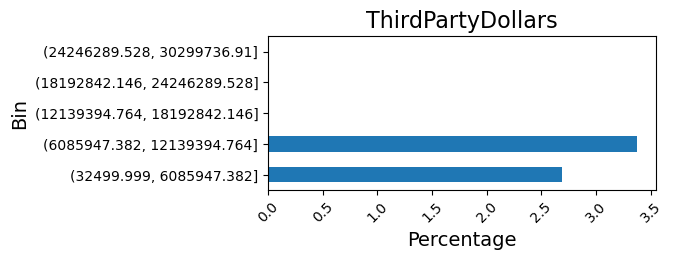

                            bin  order_id Counts  order_id Percentages  \
0      (32499.999, 6085947.382]            30419             99.133127   
1   (6085947.382, 12139394.764]              237              0.772364   
2  (12139394.764, 18192842.146]               25              0.081473   
3  (18192842.146, 24246289.528]                3              0.009777   
4   (24246289.528, 30299736.91]                1              0.003259   

   NoShow Percentage  
0           2.689109  
1           3.375527  
2           0.000000  
3           0.000000  
4           0.000000   



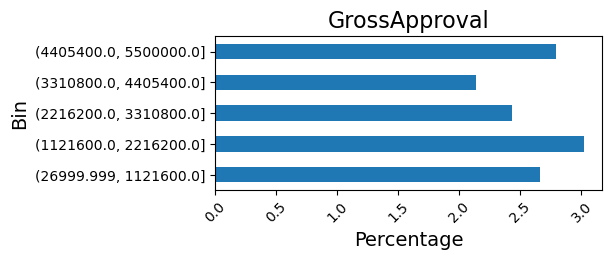

                      bin  order_id Counts  order_id Percentages  \
0  (26999.999, 1121600.0]            25374             82.691869   
1  (1121600.0, 2216200.0]             3776             12.305687   
2  (2216200.0, 3310800.0]              945              3.079681   
3  (3310800.0, 4405400.0]              375              1.222095   
4  (4405400.0, 5500000.0]              215              0.700668   

   NoShow Percentage  
0           2.660203  
1           3.019068  
2           2.433862  
3           2.133333  
4           2.790698   



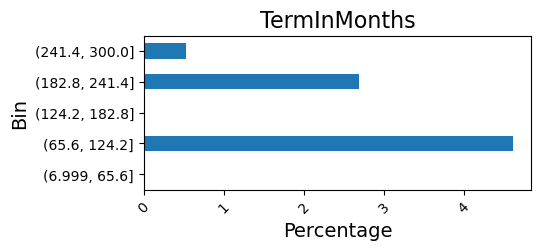

              bin  order_id Counts  order_id Percentages  NoShow Percentage
0   (6.999, 65.6]                1              0.003259           0.000000
1   (65.6, 124.2]             1866              6.081147           4.608789
2  (124.2, 182.8]                0              0.000000                NaN
3  (182.8, 241.4]            27296             88.955516           2.681712
4  (241.4, 300.0]             1522              4.960078           0.525624 



In [18]:
#Creating bar chart for distribution analysis
def plot_horizontal_bar_chart(df,x):
    try:
        # Convert the DataFrame to a format suitable for plotting
        data = df[['bin', 'NoShow Percentage']].set_index('bin').squeeze()

        # Create the figure and axis objects
        fig, ax = plt.subplots(figsize=(5, 2))

        # Plot the horizontal bar chart
        data.plot(kind='barh', ax=ax)

        # Customize the plot
        ax.set_title(x, fontsize=16)
        ax.set_xlabel('Percentage', fontsize=14)
        ax.set_ylabel('Bin', fontsize=14)

        # Rotate x-axis labels for better visibility
        plt.suptitle('')
        plt.xticks(rotation=45)

        # Display the plot
        plt.show()
    
    except Exception as e:
        print("An error occurred:", e)
        pass  # Continue with the next plot



#Creating dataframes containing 5 bins for the understanding no show distribution using plots for numerical variables
def get_bins_and_no_show_percentage(df, column, target_column, num_bins=5):
    bins = np.linspace(df[column].min(), df[column].max(), num_bins+1)
    df['bin'] = pd.cut(df[column], bins=bins, include_lowest=True,duplicates="drop")
    bin_counts = df['bin'].value_counts()
    bin_percentages = (bin_counts / len(df)) * 100
    no_show_percentages = df.groupby('bin')[target_column].mean() * 100
    result_df = pd.DataFrame({
            'order_id Counts': bin_counts,
            'order_id Percentages': bin_percentages,
            'NoShow Percentage': no_show_percentages
        }).reset_index().rename(columns={'index':column+'_bin'})
        
    return result_df

cols=[
#     'AsOfDate', 
#       'Program', 
#       'BorrName', 
#       'BorrStreet',
#       'BorrCity',
#        'BorrState',
#       'BorrZip', 'CDC_Name', 
#       'CDC_Street', 'CDC_City',
#        'CDC_State', 'CDC_Zip',
#       'ThirdPartyLender_Name',
#        'ThirdPartyLender_City', 'ThirdPartyLender_State',
      'ThirdPartyDollars',
       'GrossApproval', 
#       'ApprovalDate', 
#       'ApprovalFiscalYear',
#        'FirstDisbursementDate',
#       'DeliveryMethod', 
#       'Subprogram',
      'TermInMonths',
#        'NaicsCode', 
#       'NaicsDescription', 'FranchiseCode', 'FranchiseName',
#        'ProjectCounty', 'ProjectState', 'SBADistrictOffice',
#        'CongressionalDistrict', 'BusinessType', 'BusinessAge',
#       'LoanStatus',
#        'PaidInFullDate', 
#       'ChargeOffDate', 
#       'GrossChargeOffAmount',
#        'JobsSupported', 
#       'ApprovalYear',
#       'ApprovalMonth'
]

for x in cols:
    result = get_bins_and_no_show_percentage(df_filtererd, x, 'LoanStatus_num')
    
    
    plot_horizontal_bar_chart(result,x)
    print(f"{result} \n")

In [23]:
#Checking correlation between different variables
def highlight_values(df):
   
    styled_df = df.style.format("{:.1f}")
    
    
    # Define a function to apply the highlight condition
    def highlight_condition(value):
        if value > 75 or value < -75:
            return 'background-color: lightsalmon'
        else:
            return ''
    
    # Apply the highlight condition to all columns
    highlighted_df = styled_df.applymap(highlight_condition)
    
    return highlighted_df

cols=['ThirdPartyDollars',
      'TermInMonths',
      'GrossApproval',
     'ApprovalYear',
#      'BusinessAge'
     ]

highlighted_df = highlight_values(df_filtererd[cols].corr()*100)
print("\nHighlighted Correlation DataFrame:")
highlighted_df


Highlighted Correlation DataFrame:


,ThirdPartyDollars,TermInMonths,GrossApproval,ApprovalYear
ThirdPartyDollars,100.0,7.0,93.5,9.8
TermInMonths,7.0,100.0,7.8,26.7
GrossApproval,93.5,7.8,100.0,11.2
ApprovalYear,9.8,26.7,11.2,100.0


In [20]:
#Splitting the data into train set and test set
y=final_inf_df['ns']
X=final_inf_df.drop('ns',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104,test_size=0.3,shuffle=True) 
#Checking the stats of train set and test set
print(f"The shape for Train : {y_train.shape}")
print(f"The count of Train split is: {y_train.value_counts()}")
print(f"The % of Train split is:{y_train.value_counts(normalize=True)*100} \n")

print(f"The shape for Test : {y_test.shape}")
print(f"The count of Test split is: {y_test.value_counts()}")
print(f"The % of Test split is:{y_test.value_counts(normalize=True)*100} \n")

NameError: name 'final_inf_df' is not defined